### PROBLEM 3:
* Perform simple regression analysis of the stock prices vs the period to predict the stock value for 04-16-2018
* Calculate th Mean Squared Error(MSE) and compare its value with those of Problem 1 and 2

### KEY CONCEPTS: 

### Simple Linear Regression:
* Simple linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables:
  * One variable, denoted x, is regarded as the independent variable.
  * The other variable, denoted y, is regarded as the dependent variable.
  
* Regression assumptions:

  * Y is linearly related to x or a transformation of x

  * deviations from the regression line (residuals) follow a normal distribution

  * deviations from the regression line (residuals) have uniform variance

 


### STEP 1: 
* Import the required packages
* Provide data to work with and eventually do appropriate transformations
* Create a regression model and fit it with existing data
* Check the results of model fitting to know whether the model is satisfactory
* Apply the model for predictions

In [105]:
#data extraction


#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

my_data=pd.read_csv('honeywell.csv',delimiter=',')
my_data.head()
my_data['Date']=pd.to_datetime(my_data['Date'])
my_data.head()



,Period,Date,Close,Volume
0,1,2017-10-16,143.750000,2001900
1,2,2017-10-17,143.429993,2435600
2,3,2017-10-18,143.440002,1734100
3,4,2017-10-19,143.619995,2623100
4,5,2017-10-20,145.350006,3369500


#### Here we define the data to work with
#### The inputs (regressors, 𝑥) and output (predictor, 𝑦) should be arrays or similar objects 

In [106]:
test=np.array(my_data['Period']).reshape(-1, 1)
pred=np.array(my_data['Close'])

#### Next we create a linear regression model and fit it using the existing data



In [163]:
model = LinearRegression().fit(test, pred)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### The output of the above statement will be
* fit_intercept is a Boolean that decides whether to calculate the intercept or consider it equal to zero 
* normalize is a Boolean (False by default) that decides whether to normalize the input variables or not 
* copy_X is a Boolean (True by default) that decides whether to copy or overwrite the input variables 
* n_jobs is an integer or None (default) and represents the number of jobs used in parallel computation. None usually means one job and -1 to use all processors.


### STEP 2: Coefficient of determination
* The coefficient of determination (denoted by R2) is a key output of regression analysis. 
* The coefficient of determination is the square of the correlation (r) between predicted y scores and actual y scores; thus, it ranges from 0 to 1.
* An Rsquare of 0 means that the dependent variable cannot be predicted from the independent variable.
* An Rsquare of 1 means the dependent variable can be predicted without error from the independent variable.
* An Rsquare between 0 and 1 indicates the extent to which the dependent variable is predictable.
* For example, an R2 of 0.10 means that 10 percent of the variance in Y is predictable from X


In [109]:
r_sq = model.score(test, pred)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.003980965261022873


### STEP 3: Intercept and Slope
* The estimated regression function has the equation 𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥
* where 𝑏₀ is the intercept and 𝑏₁ is the slope

In [181]:
print('intercept:', model.intercept_)

print('slope:', model.coef_)



intercept: 150.35363989575137
slope: [0.00892628]


151.46942489575136

### RESULT: The value 𝑏₀ = 150.353 illustrates that the model predicts the response 150.35 when 𝑥 is zero. 
### The value 𝑏₁ = 0.00892 means that the predicted response rises by 0.00892 when 𝑥 is increased by one.

### STEP 4:  Predicted values
* To obtain the predicted response, we use .predict()
* We pass the regressor as the argument and get the corresponding predicted responses



In [165]:
y_prediction = model.predict(test)
print('predicted response:', y_prediction, sep='\n')


predicted response:
[150.36256617 150.37149245 150.38041873 150.38934501 150.39827128
 150.40719756 150.41612384 150.42505012 150.43397639 150.44290267
 150.45182895 150.46075522 150.4696815  150.47860778 150.48753406
 150.49646033 150.50538661 150.51431289 150.52323917 150.53216544
 150.54109172 150.550018   150.55894428 150.56787055 150.57679683
 150.58572311 150.59464939 150.60357566 150.61250194 150.62142822
 150.6303545  150.63928077 150.64820705 150.65713333 150.66605961
 150.67498588 150.68391216 150.69283844 150.70176471 150.71069099
 150.71961727 150.72854355 150.73746982 150.7463961  150.75532238
 150.76424866 150.77317493 150.78210121 150.79102749 150.79995377
 150.80888004 150.81780632 150.8267326  150.83565888 150.84458515
 150.85351143 150.86243771 150.87136399 150.88029026 150.88921654
 150.89814282 150.9070691  150.91599537 150.92492165 150.93384793
 150.9427742  150.95170048 150.96062676 150.96955304 150.97847931
 150.98740559 150.99633187 151.00525815 151.01418442 151

### Forecasted value for 04-16-2018:



In [182]:
forecast=(150.35363989575137 )+ (125*0.00892628)
forecast


151.46942489575136

### STEP 5: Coefficient of correlation
* In simple linear regression analysis, the coefficient of correlation is a statistic which indicates an association between the independent variable and the dependent variable 
* The coefficient of correlation is represented by "r" and it has a range of -1.00 to +1.00
* A correlation coefficient of 1 means that for every positive increase in one variable, there is a positive increase of a fixed proportion in the other
* A correlation coefficient of -1 means that for every positive increase in one variable, there is a negative decrease of a fixed proportion in the other
* When the coefficient of correlation is a positive amount, such as +0.80, it means the dependent variable is increasing when the independent variable is increasing and vice versa

In [120]:
my_data.corr()

,Period,Close,Volume
Period,1.000000,0.063095,0.165801
Close,0.063095,1.000000,0.291918
Volume,0.165801,0.291918,1.000000


### RESULT: As we can observe from the obtained correlation coefficients, it is 0.063 for period vs price. From this value we can say that there is very less(negligible) dependency of these two variables

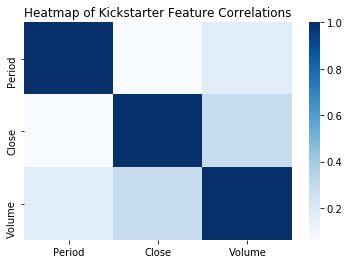

In [122]:
sns.heatmap(my_data.corr(), cmap='Blues')

plt.title('Heatmap of Kickstarter Feature Correlations')
plt.show()

### STEP 6: Calculation of MSE


In [126]:
from sklearn.metrics import mean_squared_error
y_true = np.array(my_data['Close'])
y_pred = y_prediction
mean_squared_error(y_true, y_pred)

25.54194045701938

### RESULT: Whenever the MSE value is least, we get more accurate forecast value. In our case, when we performed simple linear regression is the highest(25.54) whereas the MSE value is least when adjusted exponential smoothing is done with a trend parameter of beta=0.15 (0.16007935283965696).

### Hence we choose that value for getting the most accurate forecast (problem 2 with beta=0.15)


### Residual = Observed – Predicted


In [175]:
a=y_true-y_pred
len(a)

124

### STEP 7: Histogram of Residuals

(array([ 5.,  7.,  7., 14., 10.,  5.,  6., 11.,  4.,  8., 20.,  6.,  5.,
         4.,  5.,  4.,  1.,  1.,  0.,  1.]),
 array([-8.9501688 , -7.80253039, -6.65489198, -5.50725357, -4.35961516,
        -3.21197675, -2.06433834, -0.91669993,  0.23093848,  1.37857689,
         2.52621531,  3.67385372,  4.82149213,  5.96913054,  7.11676895,
         8.26440736,  9.41204577, 10.55968418, 11.70732259, 12.854961  ,
        14.00259941]),
 <a list of 20 Patch objects>)

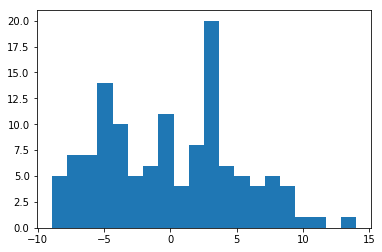

In [133]:
plt.hist(a,bins=20)

### RESULT: The resukting plot of residuals is a normal curve as there is onlt one peak

### STEP 9: Normal Probability plot of residuals
* The normal probability plot is a graphical technique for assessing whether or not a data set is approximately normally distributed.
* The data are plotted against a theoretical normal distribution in such a way that the points should form an approximate straight line. 



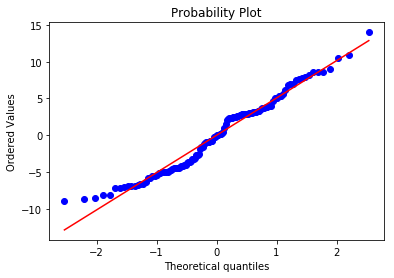

In [158]:

b=stats.probplot(a,plot=plt)

### RESULT: Examine the probability plot and assess how closely the data points follow the fitted distribution line. If the specified theoretical distribution is a good fit, the points fall closely along the straight line. The normal distribution appears to be a good fit to the data.